# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! In this tutorial, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial to play with it yourself.


# Install detectron2

In [0]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.5.0)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.15)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-fdnh_k91
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-fdnh_k91
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-5b8zvek6
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-5b8zvek6
     |████████████████████████████████| 276kB 14.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=38423 sha256=0991ea448d30bf72aaed14aa49a8b3db46af1ea8630c5906fb8878d15d709675
  Stored in directory: /tmp/pip-ephem-wheel-cache-ylbahz_t/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel 

'1.4.0'

In [0]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2937 (delta 0), reused 1 (delta 0), pack-reused 2930
Receiving objects: 100% (2937/2937), 2.02 MiB | 3.49 MiB/s, done.
Resolving deltas: 100% (1977/1977), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 61kB 4.9MB/s 


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Run a pre-trained detectron2 model

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [0]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) if you're not running a model in detectron2's core library
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the following shorthand
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)

model_final_f10217.pkl: 178MB [00:03, 51.8MB/s]                           


# COMENZAR INFERENCIA

In [0]:
# Setting output folder
!mkdir output
!mkdir output/boxes_images_all
!mkdir output/boxes_images_car
!mkdir output/boxes_txt
output_dir = '/content/output/'

In [0]:
# Clone the entire repo.
!git clone https://gitlab.com/victorvirgilio/validation.git
#%cd validation
!ls
input_dir = '/content/validation/image_2'

Cloning into 'validation'...
remote: Enumerating objects: 14976, done.
remote: Counting objects: 100% (14976/14976), done.
remote: Compressing objects: 100% (14976/14976), done.
Receiving objects: 100% (14976/14976), 5.68 GiB | 44.19 MiB/s, done.
Resolving deltas: 100% (1/1), done.
remote: Total 14976 (delta 1), reused 14970 (delta 0), pack-reused 0
Checking out files: 100% (22446/22446), done.
detectron2_repo  output  sample_data  validation


In [0]:
import cv2
from PIL import Image

def draw_boxes(img, boxes):
    for box in boxes:
        cv2.rectangle(img, box[0], box[1], (0,0,255), 2)
    return Image.fromarray(np.uint8(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

def visualizer(img):
    # We can use `Visualizer` to draw the predictions on the image.
    v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    dimg = v.get_image()[:, :, ::-1]
    # cv2_imshow(v.get_image()[:, :, ::-1]) 
    return Image.fromarray(np.uint8(dimg))

In [0]:
# Cargar nombres
names = []
with open('/content/validation/val.txt','r') as inf:
    for line in inf:
        names.append(input_dir + '/' + line[:-1] + '.png')
names = names
print(names)        

['/content/validation/image_2/000001.png', '/content/validation/image_2/000002.png', '/content/validation/image_2/000004.png', '/content/validation/image_2/000005.png', '/content/validation/image_2/000006.png', '/content/validation/image_2/000008.png', '/content/validation/image_2/000015.png', '/content/validation/image_2/000019.png', '/content/validation/image_2/000020.png', '/content/validation/image_2/000021.png', '/content/validation/image_2/000023.png', '/content/validation/image_2/000024.png', '/content/validation/image_2/000025.png', '/content/validation/image_2/000027.png', '/content/validation/image_2/000028.png', '/content/validation/image_2/000031.png', '/content/validation/image_2/000033.png', '/content/validation/image_2/000035.png', '/content/validation/image_2/000037.png', '/content/validation/image_2/000039.png', '/content/validation/image_2/000040.png', '/content/validation/image_2/000042.png', '/content/validation/image_2/000047.png', '/content/validation/image_2/0000

In [0]:
import time
import glob

save = True
nivel = 'normal'
objects = ['Car', 'Van', 'Truck']
dificultad = {'easy': [40, 0, 0.15], 'moderate': [25, 1, 0.30], 'hard': [25, 2, 0.50], 'normal': [0, 3, 1.00]}

# names = glob.glob(input_dir + '*.png')[:25]
print('Cantidad de imágenes:   {0}\n\n'.format(len(names)))

k = 0
detectron2_detections = {}
times = []
print('\n***** ***** ***** Inicio de la detección ***** ***** *****\n')
for filename in names:

    img = cv2.imread(filename)
    # Get time
    start = time.time()
    outputs = predictor(img)
    end = time.time()
    times.append(end - start)

    boxes = outputs['instances'].pred_boxes.tensor.cpu().numpy()
    classes = outputs['instances'].pred_classes.cpu().numpy()

    car = np.where(classes == 2)[0]
    bus = np.where(classes == 5)[0]
    train = np.where(classes == 6)[0]
    truck = np.where(classes == 7)[0]

    index_vehicles = np.concatenate((car, bus, train, truck), axis=0)

    final_detections = []
    for i in index_vehicles:
        left, top, right, bottom = boxes[i]
        left = max(0, np.floor(left + 0.5).astype('int32'))
        top = max(0, np.floor(top + 0.5).astype('int32'))
        right = min(img.shape[1], np.floor(right + 0.5).astype('int32'))
        bottom = min(img.shape[0], np.floor(bottom + 0.5).astype('int32'))

        box_height = bottom - top
        if(box_height >= dificultad[nivel][0]):
            final_detections.append(((left, top), (right, bottom)))

    detectron2_detections[filename] = final_detections

    if(save):
      from cv2 import imread
      car_img = draw_boxes(imread(filename), final_detections)
      car_img.save(output_dir + 'boxes_images_car' + filename[-11:])
      dimg = visualizer(img)
      dimg.save(output_dir + 'boxes_images_all' + filename[-11:])
      # Generar detecciones (targets)
      f = open(output_dir + "boxes_txt/" + filename[-11:-4] + ".txt", "w")
      for object in final_detections:
        for x, y in object:
          f.write( str(x) + ' ' + str(y) + ' ' )
        f.write( '\n' )
      f.close()

    if k%10==0:
        print('\n***** Imagen numero', k, 'fue procesada. *****')
    k+=1

print('\n\nDiccionario con las listas de detecciones por imagen obtenidas por Detectron2: ')
# print(detectron2_detections)
name = "/detectron2_detections_" + nivel + ".txt"
f = open(output_dir + name, "w")
f.write( str(detectron2_detections) )
f.close()
print('\n\t... diccionario   ' + name[1:] + '   guardado!')

tiempo_promedio = sum(times) / len(times)
print('\n\n\tPromedio de inferencia: {0}\n'.format(tiempo_promedio))

Cantidad de imágenes:   3769



***** ***** ***** Inicio de la detección ***** ***** *****


***** Imagen numero 0 fue procesada. *****

***** Imagen numero 10 fue procesada. *****

***** Imagen numero 20 fue procesada. *****

***** Imagen numero 30 fue procesada. *****

***** Imagen numero 40 fue procesada. *****

***** Imagen numero 50 fue procesada. *****

***** Imagen numero 60 fue procesada. *****

***** Imagen numero 70 fue procesada. *****

***** Imagen numero 80 fue procesada. *****

***** Imagen numero 90 fue procesada. *****

***** Imagen numero 100 fue procesada. *****

***** Imagen numero 110 fue procesada. *****

***** Imagen numero 120 fue procesada. *****

***** Imagen numero 130 fue procesada. *****

***** Imagen numero 140 fue procesada. *****

***** Imagen numero 150 fue procesada. *****

***** Imagen numero 160 fue procesada. *****

***** Imagen numero 170 fue procesada. *****

***** Imagen numero 180 fue procesada. *****

***** Imagen numero 190 fue procesada. *****

# Verificar y Descargar

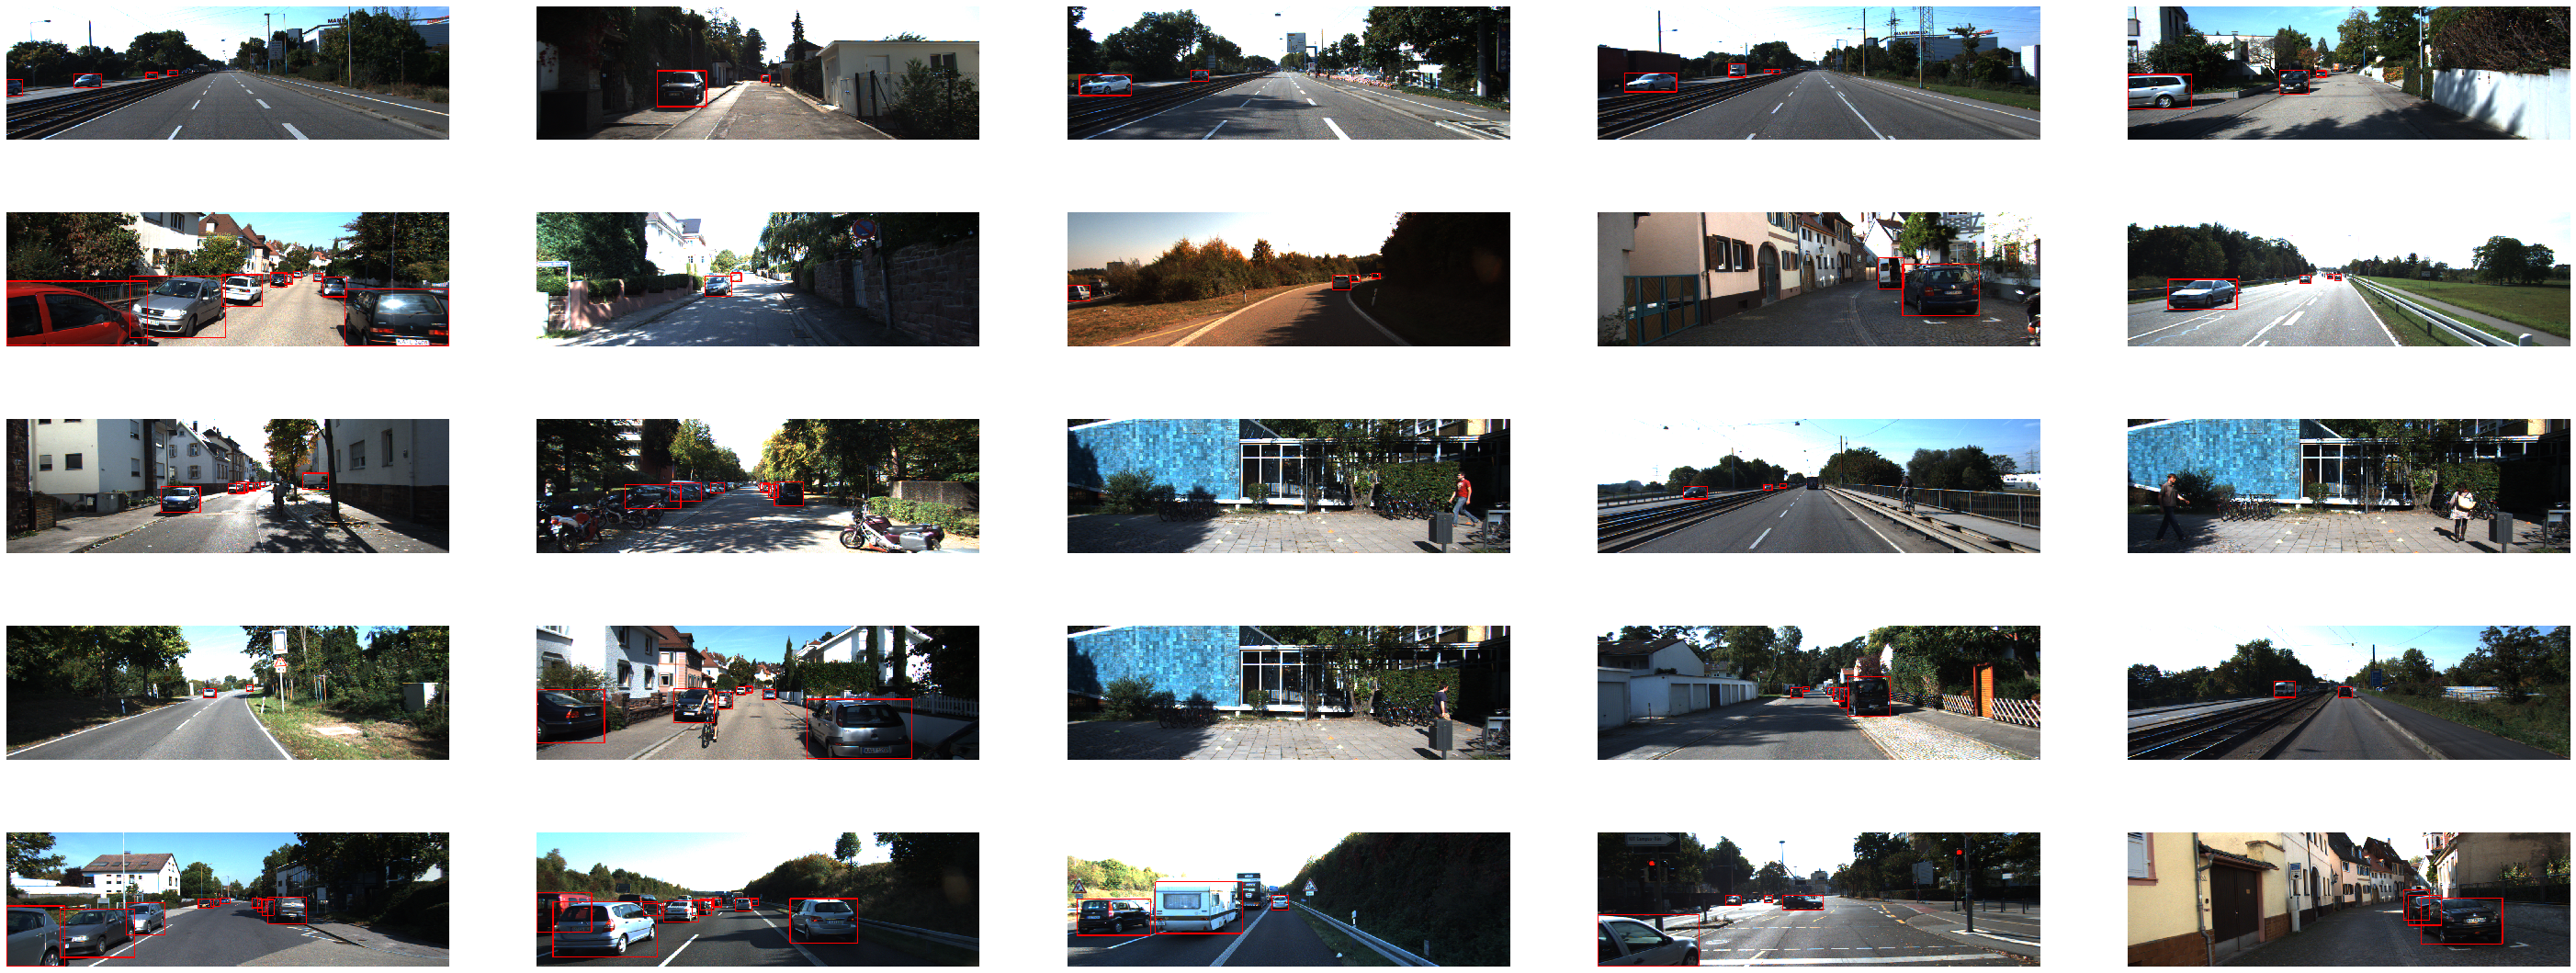

In [0]:
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import random

 # Visualizacion para verificar
plt.figure(figsize=(50,20))
for i in range(25):
    filename = names[random.randint(0,len(names)-1)]
    img = imread(filename)
    boxes = detectron2_detections[filename]
    img = draw_boxes(img, boxes)
    plt.subplot(5,5,i+1)
    plt.imshow(img) 
    plt.axis('off') 
plt.show()

In [0]:
import os

file_name = 'boxes_images_car'

# Generate Compressed File (file.zip)
import zipfile
fantasy_zip = zipfile.ZipFile(output_dir[:-7] + file_name + '.zip', 'w') # Nombre del archivo comprimido
for folder, subfolders, files in os.walk(output_dir + file_name):
  for file in files:
    if file.endswith(''): # Extensión de los archivos a comprimir
      fantasy_zip.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), output_dir + file_name), compress_type = zipfile.ZIP_DEFLATED)
fantasy_zip.close()
print('Compressed File generated (' + file_name + '.zip)!')

Compressed File generated (boxes_images_car.zip)!


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cp /content/boxes_images_all.zip '/gdrive/My Drive/'
!cp /content/boxes_images_car.zip '/gdrive/My Drive/'
!cp /content/boxes_txt.zip '/gdrive/My Drive/'